# 03_Exploratory Data Analysis_Hospital Length Of Stay

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize']=10,8
sns.set()
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

In [3]:
#df=pd.read_csv('LengthOfStay.csv')
df=pd.read_csv('LengthOfStay_new.csv') # it contains LOS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [5]:
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,LOS
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3,1-3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7,4-7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3,1-3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1,1-3
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4,4-7


 ### Target Feature (Length of stay)

Text(0.5, 1.0, 'length of stay (days at Hospital)')

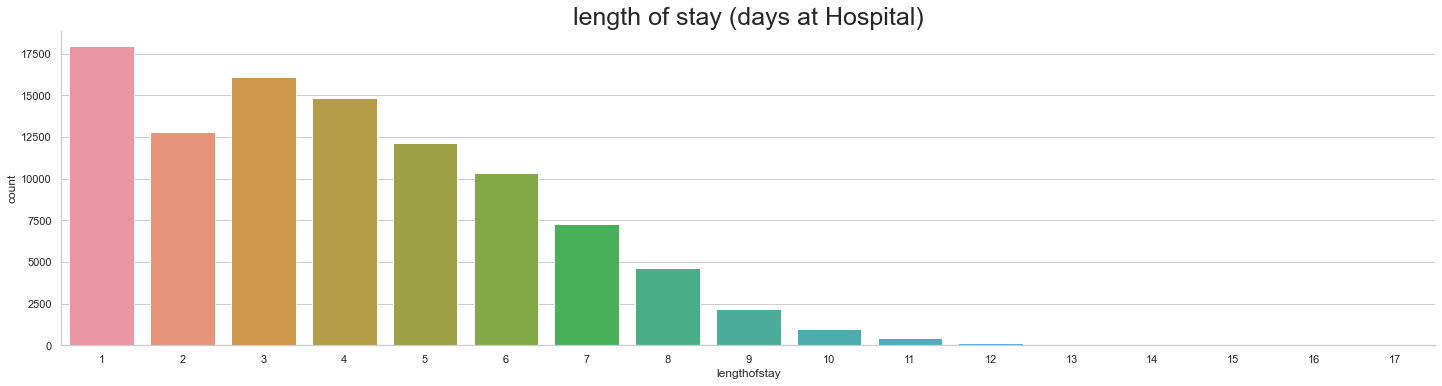

In [6]:
pl = sns.factorplot('lengthofstay',data=df, aspect=4, kind='count')
pl.set_xticklabels()
plt.title('length of stay (days at Hospital)', size=25)

In [7]:
df.lengthofstay.value_counts()

1     17979
3     16068
4     14822
2     12825
5     12116
6     10362
7      7263
8      4652
9      2184
10     1000
11      460
12      137
13       75
14       31
15       16
16        6
17        4
Name: lengthofstay, dtype: int64

Text(0.5, 1.0, 'LOS (days)')

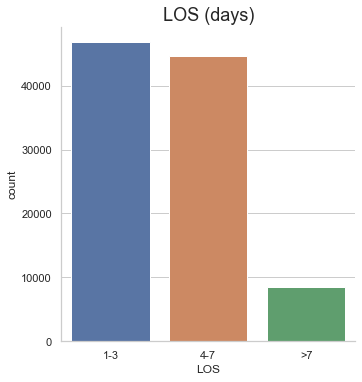

In [8]:
sns.factorplot(df.LOS, data=df,kind='count', order=['1-3','4-7','>7'])
plt.title('LOS (days)', size=18)

In [9]:
df.LOS.value_counts()

1-3    46872
4-7    44563
>7      8565
Name: LOS, dtype: int64

## Analysis of continous variables

### A.  Univariate Analysis

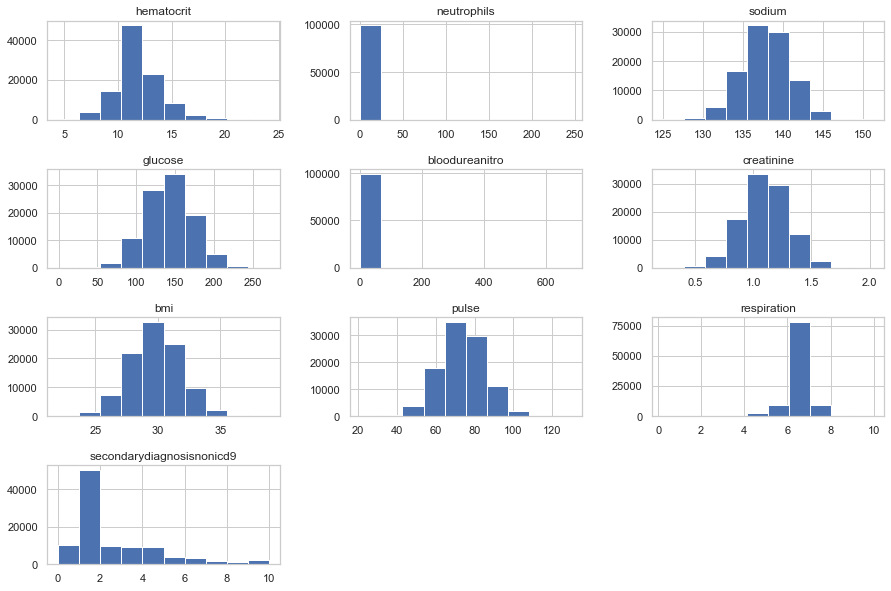

In [10]:
lab_measurements=df[["hematocrit", "neutrophils", "sodium", "glucose", "bloodureanitro", "creatinine", "bmi", "pulse", "respiration","secondarydiagnosisnonicd9","LOS"]]
lab_measurements.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

### B.  Bivariate Analysis

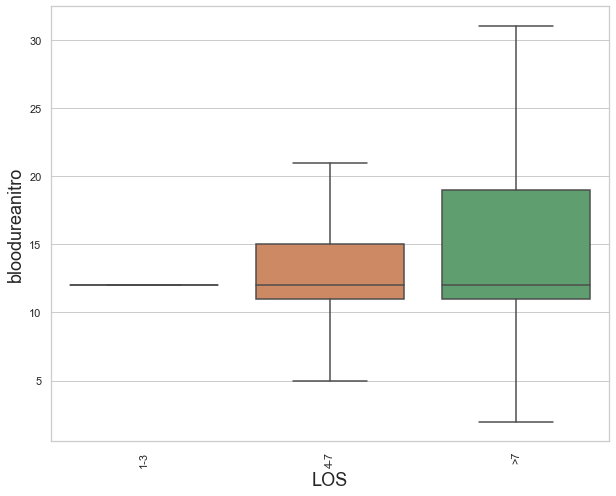

In [11]:
plt.subplots()
sns.boxplot(x='LOS', y='bloodureanitro',  data=df, showfliers=False , order=['1-3','4-7','>7'])
plt.xticks(rotation='vertical')
plt.ylabel('bloodureanitro' , size=18)
plt.xlabel('LOS', size=18);

### C.  Correlation Matrix

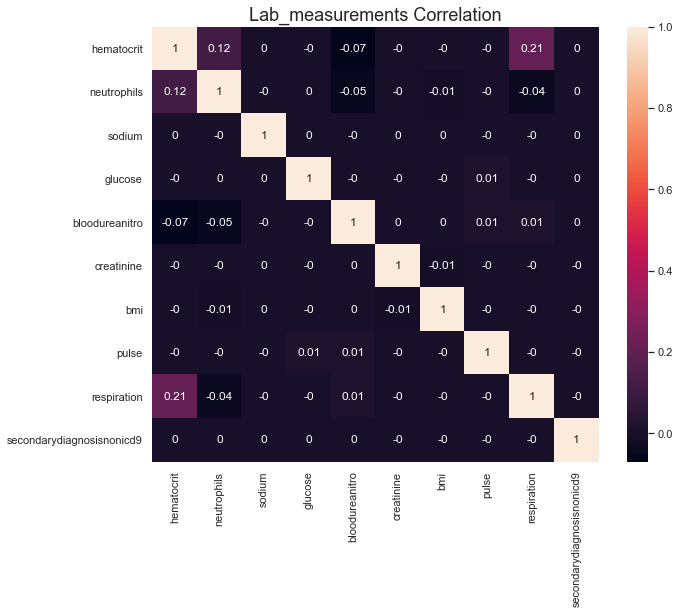

In [12]:
plt.subplots(figsize=(10,8))
sns.heatmap(np.round(lab_measurements.corr(), decimals=2), annot=True)
plt.title('Lab_measurements Correlation', size=18);

## Analysis of Caegorical Variables

In [13]:
df["number_of_issues"]= pd.to_numeric(df["hemo"]) + pd.to_numeric(df["dialysisrenalendstage"]) + pd.to_numeric(df["asthma"])\
                               + pd.to_numeric(df["irondef"]) + pd.to_numeric(df["pneum"]) + pd.to_numeric(df["substancedependence"])\
                               + pd.to_numeric(df["psychologicaldisordermajor"]) + pd.to_numeric(df["depress"])\
                               + pd.to_numeric(df["psychother"]) + pd.to_numeric(df["fibrosisandother"]) + pd.to_numeric(df["malnutrition"]) 


issues=df[[ "hemo","dialysisrenalendstage","asthma","irondef","pneum","substancedependence","psychologicaldisordermajor","depress","psychother","fibrosisandother","malnutrition","number_of_issues","LOS",'lengthofstay']]


### A.  Univariate Analysis

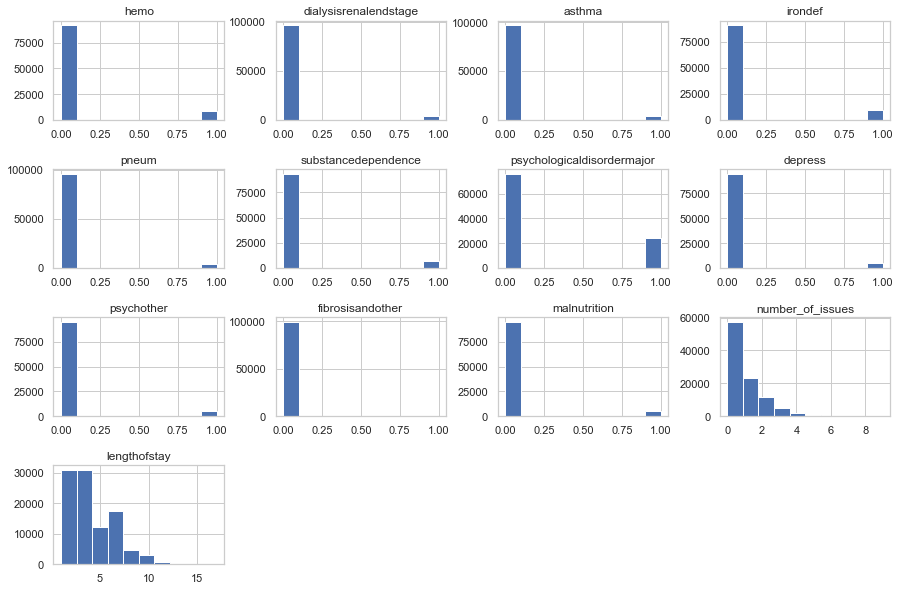

In [14]:
issues.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);
#fig.tight_layout(); 

### B.  Bivariate Analysis

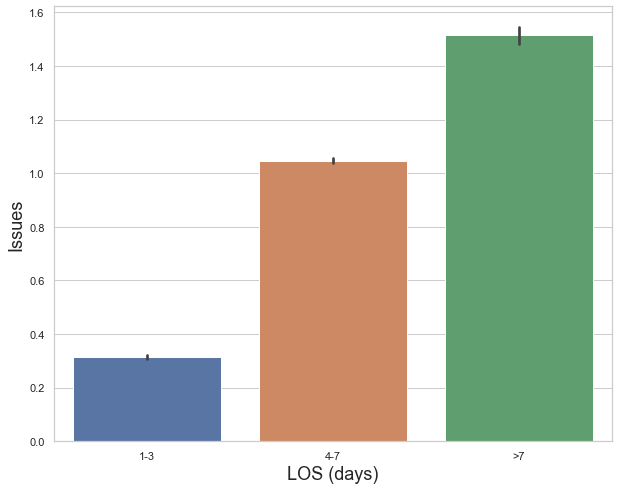

In [15]:
sns.barplot(x=issues.LOS,y=issues.number_of_issues ,order=['1-3','4-7','>7'] )
plt.ylabel('Issues' , size=18)
plt.xlabel('LOS (days)', size=18);

In [16]:
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,LOS,number_of_issues
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,1.390722,30.432418,96,6.5,4,9/1/2012,B,3,1-3,0
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,0.943164,28.460516,61,6.5,1,6/2/2012,A,7,4-7,0
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,1.065750,28.843812,64,6.5,2,9/25/2012,B,3,1-3,0
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,0.906862,27.959007,76,6.5,1,8/10/2012,A,1,1-3,0
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,1.242854,30.258927,67,5.6,2,12/24/2012,E,4,4-7,2


In [17]:
issues.head()

,hemo,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,number_of_issues,LOS,lengthofstay
0,0,0,0,0,0,0,0,0,0,0,0,0,1-3,3
1,0,0,0,0,0,0,0,0,0,0,0,0,4-7,7
2,0,0,0,0,0,0,0,0,0,0,0,0,1-3,3
3,0,0,0,0,0,0,0,0,0,0,0,0,1-3,1
4,0,0,0,0,1,0,1,0,0,0,0,2,4-7,4


                          name       std      mean
2                       asthma  1.901456  5.013326
6   psychologicaldisordermajor  2.015864  5.208501
7                      depress  2.009058  5.228804
5          substancedependence  2.102523  5.346495
3                      irondef  2.113963  5.413630
4                        pneum  2.186640  5.578707
0                         hemo  2.187077  5.743500
10                malnutrition  2.248113  5.805174
8                   psychother  2.266653  5.986030
1        dialysisrenalendstage  2.305633  6.061230
9             fibrosisandother  2.289089  6.114823


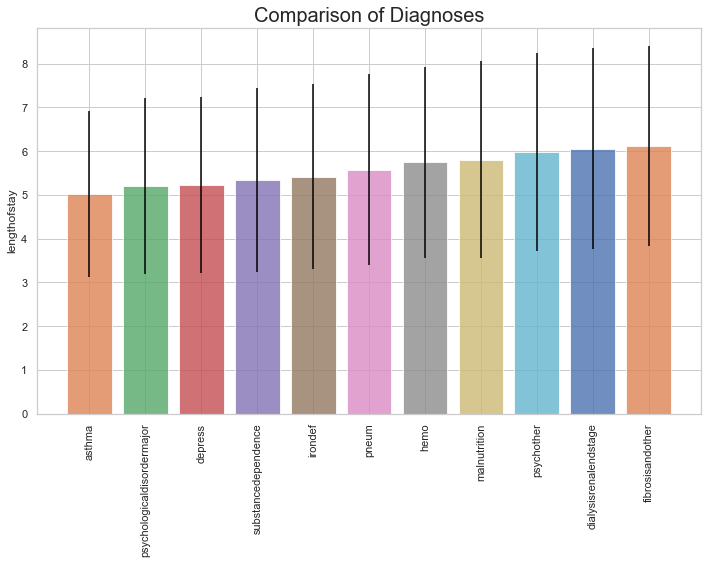

In [19]:
# intialise data of lists. 
df_issues={'name':["hemo","dialysisrenalendstage","asthma","irondef","pneum","substancedependence","psychologicaldisordermajor","depress","psychother","fibrosisandother","malnutrition"],
           'std':[],
           'mean':[]
          }
# Build the plot with error bars
fig, ax = plt.subplots()

for var in df_issues['name']:
    df_issues['std'].append(issues[[var, 'lengthofstay']].groupby(var).std().reset_index().values[1][1])
    df_issues['mean'].append(issues[[var, 'lengthofstay']].groupby(var).mean().reset_index().values[1][1])

# Create DataFrame     
df_issues = pd.DataFrame(df_issues) 
df_issues=df_issues.sort_values('mean')
print(df_issues)

ind = range(len(df_issues))

ax.bar(ind, df_issues['mean'],
           yerr=df_issues['std'],
           align='center',
           alpha=0.8,
           ecolor='black',
           capsize=None, #10
           color=['C01', 'C02', 'C03', 'C04', 'C05','C06', 'C07', 'C08', 'C09', 'C010'])
    
ax.set_ylabel('lengthofstay')
ax.set_xticks(ind)
ax.set_xticklabels(df_issues['name'], rotation = 90)
ax.set_title('Comparison of Diagnoses', size=20)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()



### C.  Correlation Matrix

<AxesSubplot:>

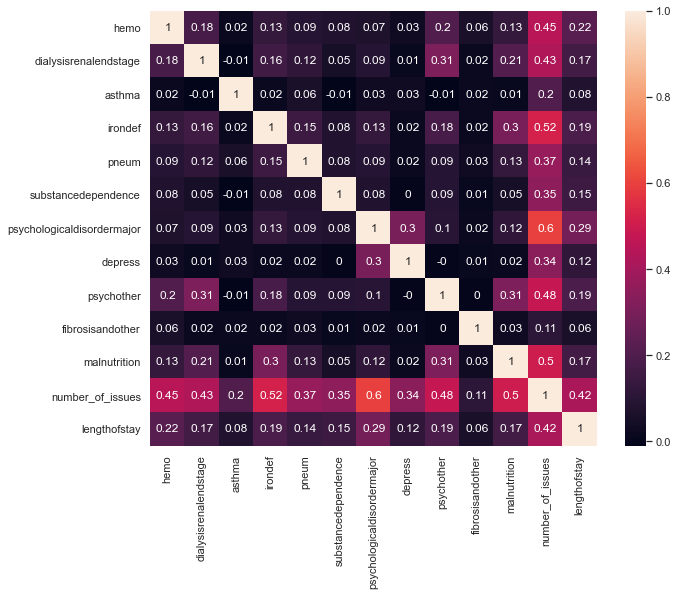

In [21]:
plt.subplots(figsize=(10,8))
sns.heatmap(np.round(issues.corr(), decimals=2), annot=True)